<a href="https://colab.research.google.com/github/imamslogic/ML/blob/main/Decision_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import os

In [28]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt 
import pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
#from utils import plot_decision

# Data Import and preparation

In [29]:
# load the iris data
df = pd.read_csv('iris.csv')
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [30]:
df['species_label'], _ = pd.factorize(df['species'])
df['species'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [31]:
# select features
y = df['species_label'] #Dependent feature
X = df[['sepal.length', 'sepal.width']] #Independent features (subset)

In [32]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.3, random_state=0)

# Training model

In [33]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Testing the model

In [34]:
y_pred = dtree.predict(X_test)

In [35]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.67


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  0  0]
 [ 1  5 12]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.71      0.28      0.40        18
           2       0.43      0.82      0.56        11

    accuracy                           0.67        45
   macro avg       0.69      0.70      0.64        45
weighted avg       0.73      0.67      0.64        45



[Text(153.45000000000002, 190.26, 'X[0] <= 5.45\nentropy = 1.58\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(83.7, 135.9, 'X[1] <= 2.75\nentropy = 0.605\nsamples = 35\nvalue = [31, 3, 1]'),
 Text(55.800000000000004, 81.53999999999999, 'X[0] <= 4.7\nentropy = 1.371\nsamples = 5\nvalue = [1, 3, 1]'),
 Text(27.900000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(83.7, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(223.20000000000002, 135.9, 'X[0] <= 5.85\nentropy = 1.2\nsamples = 70\nvalue = [3, 29, 38]'),
 Text(167.4, 81.53999999999999, 'X[1] <= 3.25\nentropy = 1.149\nsamples = 21\nvalue = [3, 15, 3]'),
 Text(139.5, 27.180000000000007, 'entropy = 0.65\nsamples = 18\nvalue = [0, 15, 3]'),
 Text(195.3, 27.180000000000007, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(279.0, 81.53999999999999, 'X[0] <= 7.05\nentrop

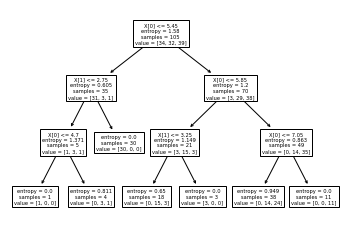

In [37]:
tree.plot_tree(dtree)